[0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


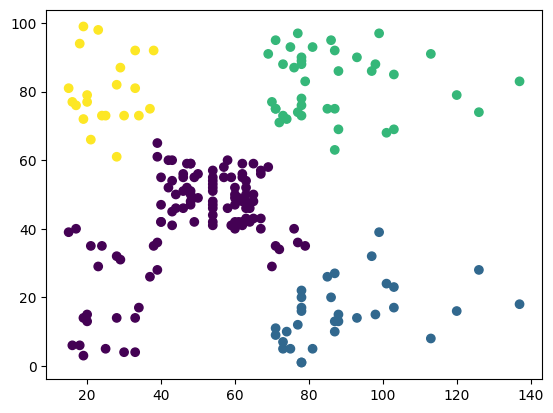

In [4]:
import pandas as pd
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('Mall_Customers.csv')
df.head()

x=np.array(df["Annual Income (k$)"])
y=np.array(df["Spending Score (1-100)"])

z = np.stack((x, y), axis=-1)
clustering = AgglomerativeClustering(n_clusters =4).fit(z)
print(clustering.labels_)

#Plotting Our Model
plt.scatter(x,y,c=clustering.labels_)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not [[137, 137], [93, 93, 99, 99, 97, 97, 98, 98, 101, 101, 103, 103, 103, 103, 49, 49, 50, 50, 48, 48, 48, 48, 48, 48, 47, 47, 46, 46, 46, 46, 44, 44, 42, 42, 43, 43, 43, 43, 37, 37, 38, 38, 39, 39, 39, 39, 40, 40, 40, 40, 25, 25, 23, 23, 24, 24, 21, 21, 20, 20, 20, 20, 15, 15, 16, 16, 19, 19, 19, 19, 17, 17, 18, 18, 34, 34, 33, 33, 33, 33, 28, 28, 28, 28, 29, 29, 30, 30, 85, 85, 86, 86, 87, 87, 87, 87, 87, 87, 88, 88, 88, 88, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 81, 81, 69, 69, 70, 70, 73, 73, 73, 73, 72, 72, 71, 71, 71, 71, 71, 71, 79, 79, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 74, 74, 75, 75, 76, 76, 77, 77, 77, 77, 67, 67, 67, 67, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 65, 65, 65, 65, 64, 64, 63, 63, 63, 63, 63, 63], [113, 113, 120, 120, 126, 126]]

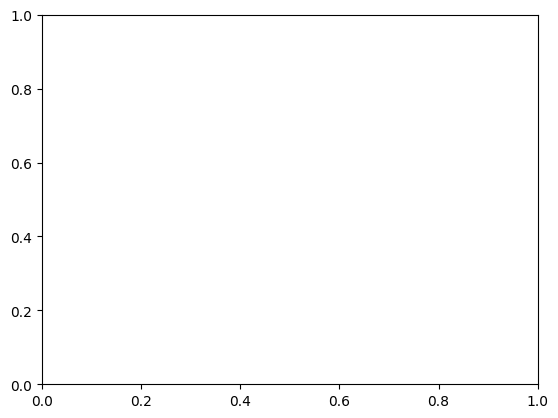

In [3]:
x=np.array(x)

def agglomerative_clustering_(X, n_clusters):
    # Initialize each data point as its own cluster
    clusters = [[x] for x in X]
    
    # Compute the pairwise distances between all clusters
    distances = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            distances[i][j] = np.linalg.norm(X[i] - X[j])
            distances[j][i] = distances[i][j]
    
    # Merge clusters until the desired number of clusters is reached
    while len(clusters) > n_clusters:
        # Find the pair of closest clusters
        min_dist = np.inf
        merge_indices = (0, 0)
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if distances[i][j] < min_dist:
                    min_dist = distances[i][j]
                    merge_indices = (i, j)
        
        # Merge the closest clusters
        merged_cluster = clusters[merge_indices[0]] + clusters[merge_indices[1]]
        clusters.pop(max(merge_indices))
        clusters.pop(min(merge_indices))
        clusters.append(merged_cluster)
        
        # Update the distance matrix
        new_distances = np.zeros((len(clusters), len(clusters)))
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                dists = []
                for x in clusters[i]:
                    for y in clusters[j]:
                        dists.append(np.linalg.norm(x - y))
                new_distances[i][j] = np.min(dists)
                new_distances[j][i] = new_distances[i][j]
        distances = new_distances
    
    return clusters

hell  = agglomerative_clustering_(x, 3)
plt.scatter(x,y,c=hell)
plt.show()
